# FINAL REPORT ON EMPLOYEE ATTRITION ANALYSIS

In [125]:
import pandas as pd
import matplotlib.pyplot as mp
from scipy.stats import pearsonr
from sklearn import preprocessing
d1 = pd.read_csv("general_data.csv") 
Label_encoder = preprocessing.LabelBinarizer()
d1["Attrition"]=Label_encoder.fit_transform(d1["Attrition"])
d1["Gender"]=Label_encoder.fit_transform(d1["Gender"])
d1["BusinessTravel"]=d1["BusinessTravel"].replace("Travel_Rarely",1)
d1["BusinessTravel"]=d1["BusinessTravel"].replace("Non-Travel",0)
d1["BusinessTravel"]=d1["BusinessTravel"].replace("Travel_Frequently",2)
d1["Department"]=d1["Department"].replace("Sales",0)
d1["Department"]=d1["Department"].replace("Research & Development",1)
d1["Department"]=d1["Department"].replace("Human Resources",2)
d1["EducationField"]=d1["EducationField"].replace("Life Sciences",0)
d1["EducationField"]=d1["EducationField"].replace("Medical",1)
d1["EducationField"]=d1["EducationField"].replace("Marketing",2)
d1["EducationField"]=d1["EducationField"].replace("Technical Degree",3)
d1["EducationField"]=d1["EducationField"].replace("Other",4)
d1["EducationField"]=d1["EducationField"].replace("Human Resources",5)
d1["MaritalStatus"]=d1["MaritalStatus"].replace("Married",1)
d1["MaritalStatus"]=d1["MaritalStatus"].replace("Single",0)
d1["MaritalStatus"]=d1["MaritalStatus"].replace("Divorce",2)
d1["JobRole"]=d1["JobRole"].replace("Sales Executive",0)
d1["JobRole"]=d1["JobRole"].replace("Research Scientist",1)
d1["JobRole"]=d1["JobRole"].replace("Laboratory Technician",2)
d1["JobRole"]=d1["JobRole"].replace("Manufacturing Director",3)
d1["JobRole"]=d1["JobRole"].replace("Healthcare Representative",4)
d1["JobRole"]=d1["JobRole"].replace("Manager",5)
d1["JobRole"]=d1["JobRole"].replace("Sales Representative",6)
d1["JobRole"]=d1["JobRole"].replace("Research Director",7)
d1["JobRole"]=d1["JobRole"].replace("Human Resources",8)
d1=d1.dropna()
d1=d1.drop_duplicates()


In [100]:
print(d1.describe())


               Age    Attrition   Department  DistanceFromHome    Education  \
count  4382.000000  4382.000000  4382.000000       4382.000000  4382.000000   
mean     36.933364     0.160885     0.739160          9.198996     2.912369   
std       9.137272     0.367467     0.527461          8.105396     1.024728   
min      18.000000     0.000000     0.000000          1.000000     1.000000   
25%      30.000000     0.000000     0.000000          2.000000     2.000000   
50%      36.000000     0.000000     1.000000          7.000000     3.000000   
75%      43.000000     0.000000     1.000000         14.000000     4.000000   
max      60.000000     1.000000     2.000000         29.000000     5.000000   

       EducationField  EmployeeCount   EmployeeID       Gender     JobLevel  \
count     4382.000000         4382.0  4382.000000  4382.000000  4382.000000   
mean         1.115244            1.0  2207.804884     0.599270     2.063898   
std          1.287909            0.0  1271.688783  

# DISTRIBUTION OF SHAPE:

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64


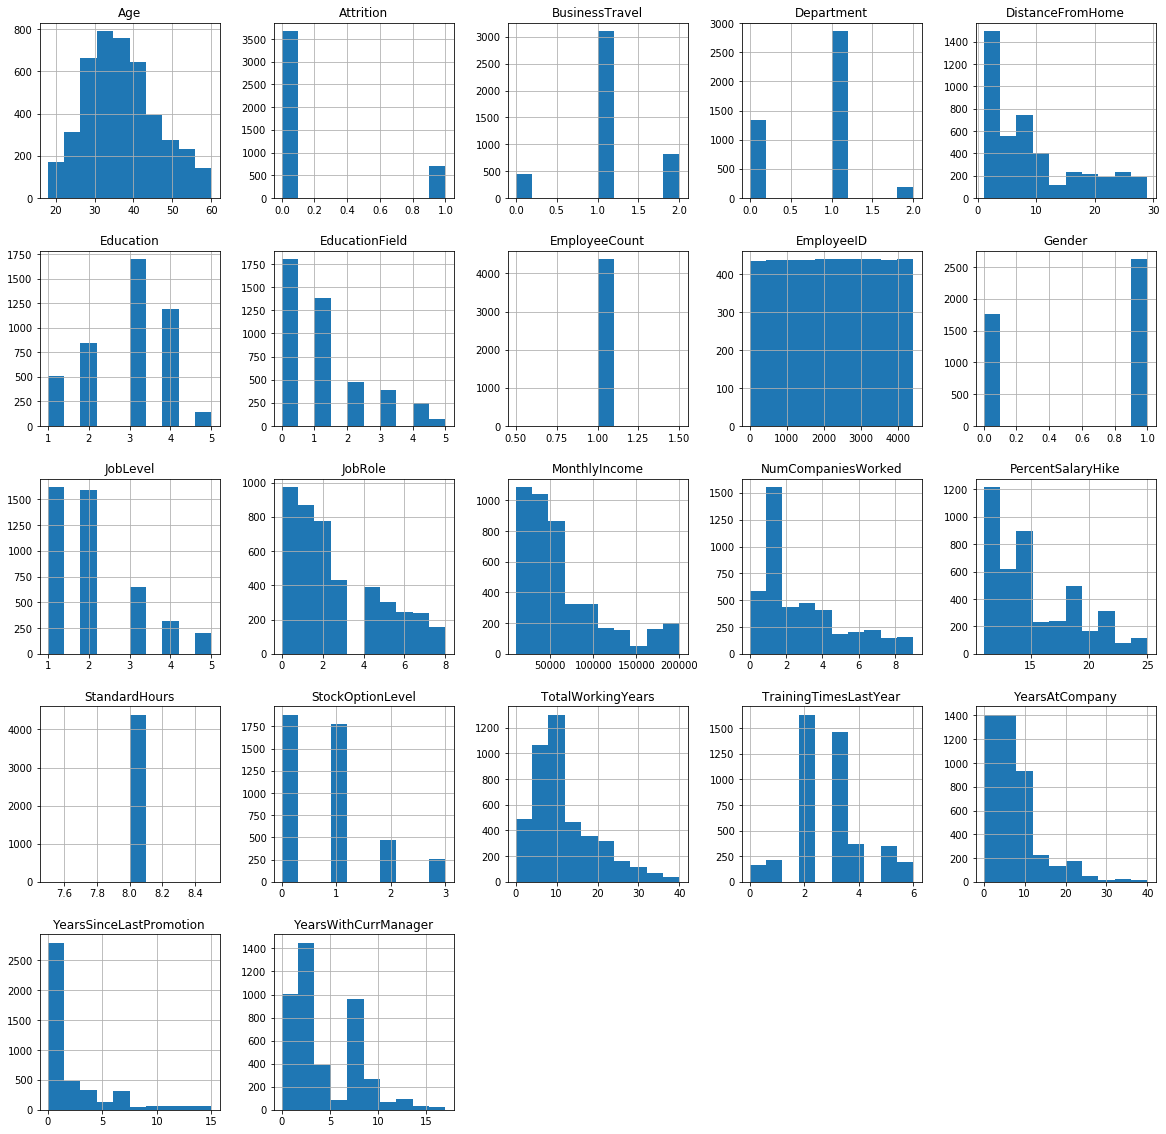

In [126]:
print(d1[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew())
d1.hist(figsize=(20,20))
mp.show()

# The inference of the above analysis are as follows:
Age, Attrition, DistanceFromHome, JobLevel, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager all have positive value hence they are POSITIVE SKEWED i.e. mean > median

Education and Gender having negative value, hence they are NEGATIVESKEW i.e. median > mean

In [102]:
print(d1[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt())


Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64


# Inference for above analysis:
Age, DistanceFromHome, PercentSalaryHike having negative values that means they are PLATYKURTIC

Attrition, JobLevel, MonthlyIncome, StockOptionLevel, YearsWithCurrManager, YearsSinceLastPromotion, YearsAtCompany, TrainingTimesLastYear, TotalWorkingYears all are Leptokurtic as having positive values

While, StandardHours, EmployeeCount are Mesokurtic as having value 0



# OUTLIERS

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001B736F17FC8>, <matplotlib.lines.Line2D object at 0x000001B736F17F88>], 'caps': [<matplotlib.lines.Line2D object at 0x000001B736F1AFC8>, <matplotlib.lines.Line2D object at 0x000001B736F1AF48>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001B736F05948>], 'medians': [<matplotlib.lines.Line2D object at 0x000001B736F1FF48>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001B736F1FEC8>], 'means': []}


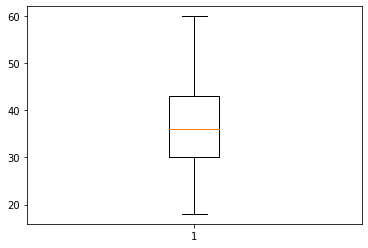

In [49]:
print(mp.boxplot(d1.Age))

__Age has no outliers__

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001B7337F9348>, <matplotlib.lines.Line2D object at 0x000001B7357E68C8>], 'caps': [<matplotlib.lines.Line2D object at 0x000001B7358FF908>, <matplotlib.lines.Line2D object at 0x000001B7358FFE48>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001B73395D9C8>], 'medians': [<matplotlib.lines.Line2D object at 0x000001B736F17288>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001B736F426C8>], 'means': []}


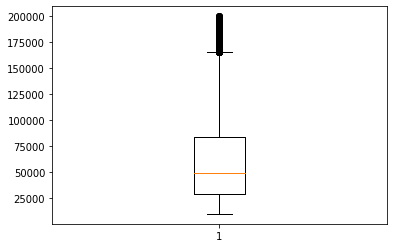

In [50]:
print(mp.boxplot(d1.MonthlyIncome))

__MonthlyIncome having outliers and positive skewed__

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001B736BE1048>, <matplotlib.lines.Line2D object at 0x000001B736B22B48>], 'caps': [<matplotlib.lines.Line2D object at 0x000001B736BF7A48>, <matplotlib.lines.Line2D object at 0x000001B736BF7288>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001B736BB6B48>], 'medians': [<matplotlib.lines.Line2D object at 0x000001B736B16C08>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001B736B60648>], 'means': []}


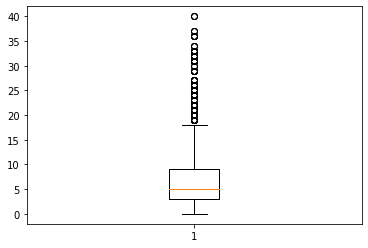

In [54]:
print(mp.boxplot(d1.YearsAtCompany))

__Years at company also has outliers and positive skewed__

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001B7358C9408>, <matplotlib.lines.Line2D object at 0x000001B7357FA608>], 'caps': [<matplotlib.lines.Line2D object at 0x000001B7358C1FC8>, <matplotlib.lines.Line2D object at 0x000001B735890508>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001B734183708>], 'medians': [<matplotlib.lines.Line2D object at 0x000001B735818248>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001B7341B7688>], 'means': []}


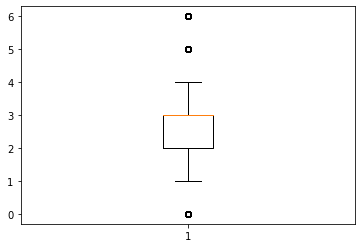

In [56]:
print(mp.boxplot(d1.TrainingTimesLastYear))

__TrainingTimesLastYear has several outliers and Negative skewed__

# <span style="color:Blue"> CORRELATIONS ANALYSIS </span>


<span style="color:Red">__CORRELATION BETWEEN ATTRITION and AGE__</span>

H0 >> There will be no significant correlation between Attrition and Age

Ha >> There will be significant correlation between Attrition and Age


In [44]:
stats,p=pearsonr(d1.Attrition,d1.Age)
print(stats,p)

-0.15920500686577965 1.996801615886744e-26


___There is moderate negative correlation between Attrition and Age also p-value < 0.05 so will accept Ha i.e.There will be significant correaltion between Attrition and Age___

<span style="color:Red">__CORRELATION BETWEEN ATTRITION and DISTANCEFROMHOME__</span>

H0 >> There will be no significant correlation between Attrition and DistanceFromHome

Ha >> There will be significant correlation between Attrition and DistanceFromHome

In [80]:
stats,p=pearsonr(d1.Attrition,d1.DistanceFromHome)
print(stats,p)

-0.009448638515156243 0.5317715668019558


___There is low negative correlation between Attrition and DistanceFromHome also p-value > 0.05 H0 wii be accepted which stats that there will be no correaltion between Attrition and DistanceFromHome___

<span style="color:Red">__CORRELATION BETWEEN ATTRITION and MONTHLYINCOME__</span>

H0 >> There will be no significant correlation between Attrition and MonthlyIncome

Ha >> There will be significant correlation between Attrition and MonthlyIncome

In [77]:
stats,p=pearsonr(d1.Attrition,d1.MonthlyIncome)
print(stats,p)

-0.030160293808460668 0.045890862744719166


___There is low negative correlation between Attrition and MonthlyIncome and as p-value < 0.05 Ha will be accepted i.e. There will be significant correaltion between Attrition and MonthlyIncome___

<span style="color:Red">__CORRELATION BETWEEN ATTRITION and GENDER__</span>

H0 >> There will be no significant correlation between Attrition and Gender

Ha >> There will be significant correlation between Attrition and Gender

In [75]:
stats,p=pearsonr(d1.Attrition,d1.Gender)
print(stats,p)

0.01839642519444095 0.22339966086831062


___There is low positive correlation between Attrition and Gender also
p-value > 0.05 so will accept H0 i.e. There is no significant correlation between Attrition and Gender___

<span style = "color:Red">__CORRELATION BETWEEN ATTRITION and TOTALWORKINGYEARS__</span>

H0 >> There will be no significant correlation between Attrition and TotalWorkingYear

Ha >> There will be significant correlation between Attrition and TotalWorkingYear

In [74]:
stats,p=pearsonr(d1.Attrition,d1.TotalWorkingYears)
print(stats,p)

-0.16966991684723917 1.1645434967091854e-29


___There is low negative correlation between Attrition and TotalWorkingYears, also p-value<0.05 hence Ha will be accepted i.e. There will be significant correlation between Attrition and TotalWorkingYears___

<span style = "color:Red">__CORRELATION BETWEEN ATTRITION and TRAININGTIMESLASTYEAR__</span>

H0 >> There will be no significant correlation between Attrition and TrainingTimesLastYear

Ha >> There will be significant correlation between Attrition and TrainingTimeslastYear

In [79]:
stats,p=pearsonr(d1.Attrition,d1.TrainingTimesLastYear)
print(stats,p)

-0.04758573693081737 0.0016276603635477602


___There is low negative correlation between Attrition and TotalWorkingYears also as p-value < 0.05 so Ha will be accepted i.e. There will be significant correlation between Atrition and TrainingTimesLastYear___



<span style = "color:Red"> __CORRELATION BETWEEN ATTRITION and YEARSATCOMPANY__</span>

H0 >> There will be no significant relation between Attrition and YearsAtCompany

Ha >> There will be significant relation between Attrition and YearsAtCompany

In [81]:
stats,p=pearsonr(d1.Attrition,d1.YearsAtCompany)
print(stats,p)

-0.13300261842521538 9.476118084840815e-19


___There is low negative correlation between Attrition and YearsAtCompany also as p-value < 0.05 so Ha will be accepted i.e. There will be significant correlation between Atrition and YearsAtCompany___



<span style = "color:Red"> __CORRELATION BETWEEN ATTRITION and YEARSSINCELASTPROMOTION__</span>

H0 >> There will be no significant relation between Attrition and YearsSinceLastPromotion

Ha >> There will be significant relation between Attrition and YearsSinceLastPromotion

In [83]:
stats,p=pearsonr(d1.Attrition,d1.YearsSinceLastPromotion)
print(stats,p)

-0.03142315056330995 0.03752293607395154


___There is low negative correlation between Attrition and YearsSinceLastPromotion also as p-value > 0.05 so H0 will be accepted i.e. There will be no significant correlation between Atrition and YearsSinceLastPromotion___



<span style = "color:Red"> __CORRELATION BETWEEN ATTRITION and YEARSWITHCURRMANAGER__</span>

H0 >> There will be no significant relation between Attrition and YearsWithCurrManager

Ha >> There will be significant relation between Attrition and YearsWithCurrManager

In [84]:
stats,p=pearsonr(d1.Attrition,d1.YearsWithCurrManager)
print(stats,p)

-0.15469153690287274 7.105369646771178e-25


___There is low negative correlation between Attrition and YearsWithCurrManager also as p-value < 0.05 so Ha will be accepted i.e. There will be significant correlation between Atrition and YearsWithCurrManager___



<span style = "color:Red"> __CORRELATION BETWEEN ATTRITION and BUSINESS TRAVEL__</span>

H0 >> There will be no significant relation between Attrition and Business Travel

Ha >> There will be significant relation between Attrition and Business Travel

In [108]:
stats,p=pearsonr(d1.Attrition,d1.BusinessTravel)
print(stats,p)

0.12530593310429688 8.411436982028483e-17


___There is low positive correlation between Attrition and Business Travel also as p-value < 0.05 so Ha will be accepted i.e. There will be significant correlation between Atrition and Business Travel___



<span style = "color:Red"> __CORRELATION BETWEEN ATTRITION and DEPARTMENT__</span>

H0 >> There will be no significant relation between Attrition and Department

Ha >> There will be significant relation between Attrition and Department

In [109]:
stats,p=pearsonr(d1.Attrition,d1.Department)
print(stats,p)

0.0446237516075303 0.0031310203124893013


___There is low positive correlation between Attrition and Business Travel also as p-value < 0.05 so Ha will be accepted i.e. There will be significant correlation between Atrition and Department___



<span style = "color:Red"> __CORRELATION BETWEEN ATTRITION and EDUCATION FIELD__</span>

H0 >> There will be no significant relation between Attrition and Education Field

Ha >> There will be significant relation between Attrition and Education Field

In [110]:
stats,p=pearsonr(d1.Attrition,d1.Department)
print(stats,p)

0.0446237516075303 0.0031310203124893013


___There is low positive correlation between Attrition and Business Travel also as p-value < 0.05 so Ha will be accepted i.e. There will be significant correlation between Atrition and EducationField___



# <span style="color:Blue"> TEST ANALYSIS </span>

In [42]:
d2=pd.read_excel("general_data.xlsx",sheet_name=1)
d3=pd.read_excel("general_data.xlsx",sheet_name=2)
from sklearn import preprocessing
Label_encoder = preprocessing.LabelBinarizer()
d2["Attrition"]=Label_encoder.fit_transform(d2["Attrition"])
d3["Attrition"]=Label_encoder.fit_transform(d3["Attrition"])
d2=d2.dropna()
d2=d2.drop_duplicates()
d3=d3.dropna()
d3=d3.drop_duplicates()

#  MANN-WHITNEY TEST 

<span style="color:Red">__ATTRITION Vs DISTANCE FROM HOME__</span>

H0 >> There is no significant differences in the DistanceFromHome between Attrition (Y) and Attrition (N)

H0 >> There is significant differences in the DistanceFromHome between Attrition (Y) and Attrition (N)


In [58]:
a1=d2.DistanceFromHome
a2=d3.DistanceFromHome
stat,p = mannwhitneyu(a1,a2)
print(stat,p)

1295261.0 0.488538986087403


___As p -value > 0.05, hence H0 will be accepted i.e.___

___There will be  significant differences in the DistanceFromHome between Attrition(Y) and Attrition (N)___

<span style="color:Red">__ATTRITION Vs MONTHLY INCOME__</span>

H0 >> There is no significant difference in MonthlyIncome between the employees leaving the company and those staying in the         company.

Ha >>There is significant difference in MonthlyIncome between the employees leaving the company and those staying in the            company.

In [59]:
m1=d2.MonthlyIncome
m2=d3.MonthlyIncome
stat,p = mannwhitneyu(m1,m2)
print(stat,p)

1249573.5 0.06508807631576838


___As p-value > 0.05, hence Ha will be accepted i.e.___

___There is no significant difference between the monthly income of employees leaving the company and those staying in the company.___



<span style="color:Red">__ATTRITION Vs PERCENT SALARY HIKE__</span>

H0 >> There is no significant difference in percentsalaryhike between the employees who leaving the company and those staying in the company.

Ha >>There is significant difference in perecentsalaryhike between the employees who leaving the company and those staying in the company.

In [67]:
m1=d2.PercentSalaryHike
m2=d3.PercentSalaryHike
stat,p = mannwhitneyu(m1,m2)
print(stat,p)

1231873.5 0.017810794960084964


___p-value < 0.05, Ha will be accepted i.e.___

___There is significant difference in percentsalaryhike between the employees who leaving the company and those who stay___


<span style="color:Red">__ATTRITION Vs TOTAL WORKING YEARS__</span>

H0 >> There is no significant difference in TotalWorkingYears between the employees who leaving the company and those staying in the company.

Ha >>There is significant difference in TotalWorkingYears between the employees who leaving the company and those staying in the company.

In [68]:
m1=d2.TotalWorkingYears
m2=d3.TotalWorkingYears
stat,p = mannwhitneyu(m1,m2)
print(stat,p)

895173.5 2.741211827689903e-39


___p-value < 0.05, Ha will be accepted i.e.___

___There is significant difference in TotalWorkingYears between the employees who leaving the company and those who stay___


<span style="color:Red">__ATTRITION Vs YEARS AT COMPANY__</span>

H0 >> There is no significant difference in YearsAtCompany between the employees who leaving the company and those staying in the company.

Ha >>There is significant difference in YearsAtCompany between the employees who leaving the company and those staying in the company.

In [69]:
m1=d2.YearsAtCompany
m2=d3.YearsAtCompany
stat,p = mannwhitneyu(m1,m2)
print(stat,p)

912579.0 3.3433144809752036e-36


___p-value < 0.05, Ha will be accepted i.e.___

___There is significant difference in YearsAtCompany between the employees who leaving the company and those who stay___


<span style="color:Red">__ATTRITION Vs YEARS SINCE LAST PROMOTION__</span>

H0 >> There is no significant difference in Years Since Last Promotion between the employees who leaving the company and those staying in the company.

Ha >>There is significant difference in Years Since Last Promotion between the employees who leaving the company and those stayed

In [70]:
m1=d2.YearsSinceLastPromotion
m2=d3.YearsSinceLastPromotion
stat,p = mannwhitneyu(m1,m2)
print(stat,p)

1196606.0 0.00037904698157957496


___p-value < 0.05, Ha will be accepted i.e.___

___There is significant difference in Years Since Last Promotion between the employees who leaving the company and those who stayed___


<span style="color:Red">__ATTRITION Vs TRAINING TIMES LAST YEAR__</span>

H0 >> There is no significant difference in Training Times Last Year between the employees who leaving the company and those stayed in the company.

Ha >>There is significant difference in Training Times Last Year between the employees who left the company and those stayed in the company.

In [89]:
m1=d2.TrainingTimesLastYear
m2=d3.TrainingTimesLastYear
stat,p = mannwhitneyu(m1,m2)
print(stat,p)

1225582.0 0.008107344081224082


___p-value < 0.05, Ha will be accepted i.e.___

___There is significant difference in Training Times Last Year between the employees who left the company and those who stayed___


<span style="color:Red">__ATTRITION Vs AGE__</span>

H0 >> There is no significant difference in Age between the employees who leaving the company and those stayed in the company.

Ha >>There is significant difference in Age between the employees who left the company and those stayed in the company.

In [88]:
m1=d2.Age
m2=d3.Age
stat,p = mannwhitneyu(m1,m2)
print(stat,p)

949178.0 7.98668614365882e-30


___p-value < 0.05, Ha will be accepted i.e.___

___There is significant difference in Age between the employees who left the company and those who stayed___


# CHI-SQUARE TEST

In [74]:
from scipy.stats import chi2_contingency

<span style="color:Red">__ATTRITION Vs GENDER__</span>

H0 >> There is no dependency between Gender and Attrition 

Ha >> There is dependency between Gender and Attrition

In [86]:
m1=pd.crosstab(d1.Attrition,d1.Gender)
stats,p,dof,expected = chi2_contingency(m1)
print(stats,p)

1.3825823839528295 0.23966176275638887


___p-value > 0.05, H0 will be accepted i.e.___

___There is no dependency between Gender and Attrition___


<span style="color:Red">__ATTRITION Vs BUSINESS TRAVEL__</span>

H0 >> There is no dependency between Business Travel and Attrition 

Ha >> There is dependency between Business Travel and Attrition

In [87]:
m1=pd.crosstab(d1.Attrition,d1.BusinessTravel)
stats,p,dof,expected = chi2_contingency(m1)
print(stats,p)

70.07594084831368 6.070197027363876e-16


___p-value < 0.05, Ha will be accepted i.e.___

___There is dependency between Business Travel and Attrition___


<span style="color:Red">__ATTRITION Vs DEPARTMENT__</span>

H0 >> There is no dependency between Department and Attrition 

Ha >> There is dependency between Department and Attrition

In [90]:
m1=pd.crosstab(d1.Department,d1.Department)
stats,p,dof,expected = chi2_contingency(m1)
print(stats,p)

8764.0 0.0


___p-value < 0.05, Ha will be accepted i.e.___

___There is dependency between Department and Attrition___


<span style="color:Red">__ATTRITION Vs EDUCATION FIELD__</span>

H0 >> There is no dependency between Education Field and Attrition 

Ha >> There is dependency between Education Field and Attrition

In [91]:
m1=pd.crosstab(d1.Education,d1.Education)
stats,p,dof,expected = chi2_contingency(m1)
print(stats,p)

17528.0 0.0


___p-value < 0.05, Ha will be accepted i.e.___

___There is dependency between Education Field and Attrition___


<span style="color:Red">__ATTRITION Vs JOB ROLE__</span>

H0 >> There is no dependency between Job Role and Attrition 

Ha >> There is dependency between Job Role and Attrition

In [92]:
m1=pd.crosstab(d1.JobRole,d1.JobRole)
stats,p,dof,expected = chi2_contingency(m1)
print(stats,p)

35056.0 0.0


___p-value < 0.05, Ha will be accepted i.e.___

___There is dependency between Job Role and Attrition___


<span style="color:Red">__ATTRITION Vs MARITAL STATUS__</span>

H0 >> There is no dependency between Marital Status and Attrition 

Ha >> There is dependency between Marital Status and Attrition

In [93]:
m1=pd.crosstab(d1.MaritalStatus,d1.MaritalStatus)
stats,p,dof,expected = chi2_contingency(m1)
print(stats,p)

8764.0 0.0


___p-value < 0.05, Ha will be accepted i.e.___

___There is dependency between Marital Status and Attrition___


# <span style="color:Blue"> CONCLUSION </span> 

__Employees who left have less salary hike, so this could be managed by increasing hike without loss in company.__

__Employees mostly left due to less working experience and also having less knowledge about technology, hence training should be arranged frequently to make employees more relevant to new technologies.__

__Promotion with years of experience is necessary and also one of factor affecting attrition__

__Business Travel is very necessary to keep employees uptodate and cultivate enthusisasm among employees, so there should be compulsory business trip for employees who travel rarely.__

__Some parameters such as  Marital Status, Job Role, Education Field are some of the parameters, which show strong association with attrition, positively or negatively.__